# Air quality comparison in Turin during 2020
Comparing Google mobility data with air quality data provided by regional autority (ARPA).

In [241]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from matplotlib import dates

## Mobility Dataset:

### Reading mobility data 
Provided by: <br>
Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ 

In [242]:
path = 'data/Mobility/2020_IT_Region_Mobility_Report.csv'
palette = ["blue","red","green","orange","purple","brown"]
labels=['Retail & Recreation','Grocery & Pharmacy','Parks','Transit stations','Workplaces','Residential']
positions = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']

it_mobility_data = pd.read_csv(path, parse_dates=['date'])

### Filtering Data

In [243]:
#Filtering by sub_region
to_mobility_data = it_mobility_data[it_mobility_data['sub_region_2'] == 'Metropolitan City of Turin'].copy()
#remove empty column
to_mobility_data.dropna(how='all', axis=1, inplace=True)

### Multi-Line plot

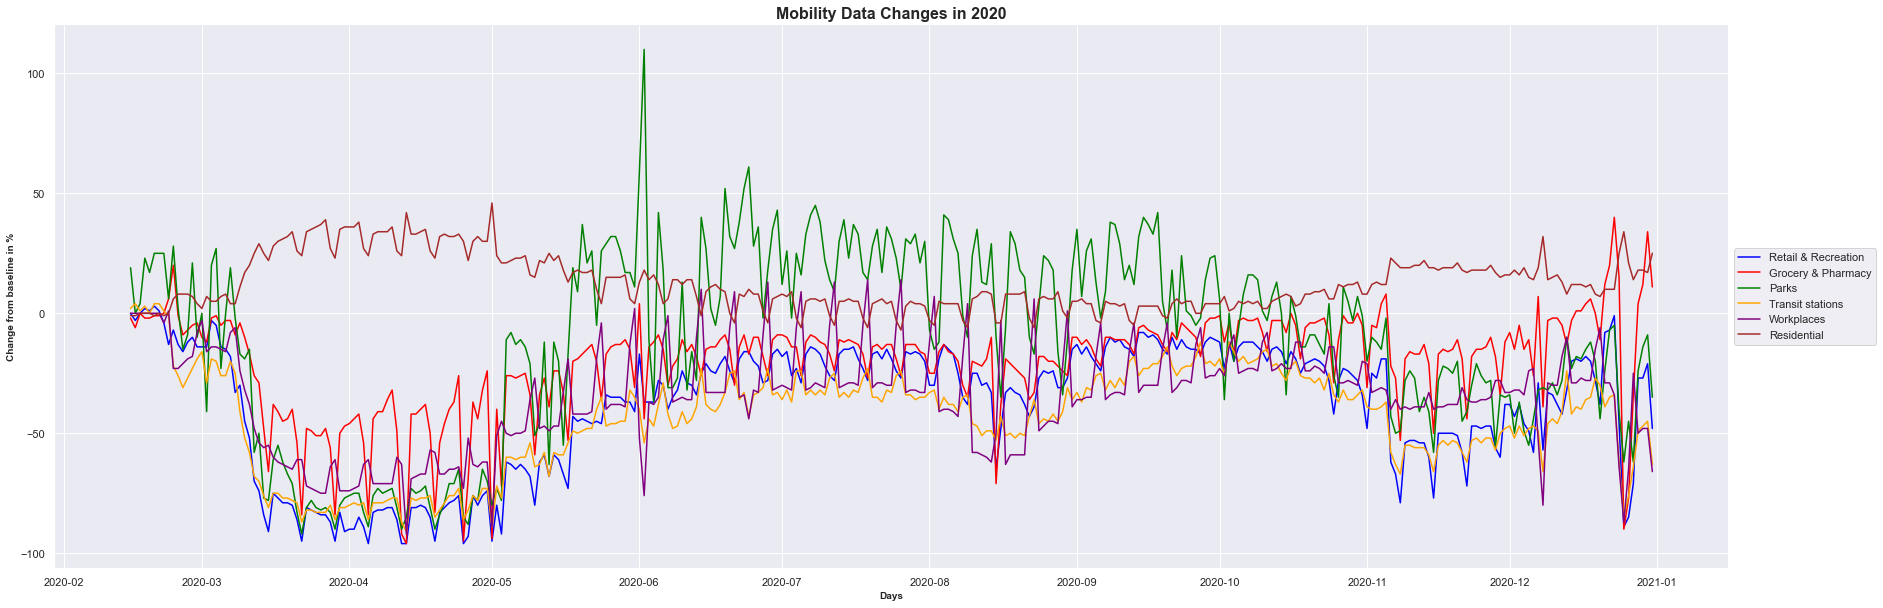

In [244]:
#set seaborn grapichs theme
sns.set_theme()

plt.figure(figsize=(30, 10))




# create a color palette
#palette = plt.get_cmap('Paired')

num = 0
plots =[]

for y in positions:
    line = to_mobility_data[y]
    p = plt.plot(to_mobility_data.date,line, label=labels[num], color=palette[num])
    plots += p
    num+=1

plt.xlabel('Days',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel('Change from baseline in %',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.legend(handles=plots)
plt.title("Mobility Data Changes in 2020",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
sns.despine()
plt.show()

#### Rename columns

In [245]:
to_mobility_data= to_mobility_data.rename(columns = {'retail_and_recreation_percent_change_from_baseline':labels[0], 'grocery_and_pharmacy_percent_change_from_baseline':labels[1],
                                    'parks_percent_change_from_baseline':labels[2],'transit_stations_percent_change_from_baseline':labels[3],
                                    'workplaces_percent_change_from_baseline':labels[4],'residential_percent_change_from_baseline':labels[5],})

## Air Quality Dataset:

### Reading ARPA data 
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [246]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data rilevamento': str, 'Ora':str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data rilevamento"] = dataFrame["Data rilevamento"] + " " +  dataFrame["Ora"]
    dataFrame["Data rilevamento"] = pd.to_datetime(dataFrame["Data rilevamento"], format='%d/%m/%Y %H:%M') 
    return dataFrame

def get_daily_adjusted_data(path):
    initial_data=read_ARPA_csv(path)
    #group by day
    data_daily = initial_data.resample('D', on='Data rilevamento').mean()
    #adjusting on baseline
    reference_period = initial_data[(initial_data['Data rilevamento'] >= '2020-01-03') & (initial_data['Data rilevamento'] < '2020-02-06')]
    basevalue = reference_period['Valore'].mean()
    adjusted_data = data_daily[(data_daily.index.get_level_values('Data rilevamento') >= '2020-02-15')]
    return_data = adjusted_data[:]
    return_data['Valore'] = ((return_data['Valore']-basevalue)/basevalue)*100
    return return_data   

### Get Air Quality Data

#### PM10

In [247]:
consolata_pm10=get_daily_adjusted_data('data/ARPA/PM10/Consolata/Torino-Consolata_Polveri-sottili')
rebaudengo_pm10 = get_daily_adjusted_data('data/ARPA/PM10/Rebaudengo/Torino-Rebaudengo_Polveri-sottili')
lingotto_pm10 = get_daily_adjusted_data('data/ARPA/PM10/Lingotto/Torino-Lingotto_Polveri-sottili')
rubino_pm10 = get_daily_adjusted_data('data/ARPA/PM10/Rubino/Torino-Rubino_Polveri-sottili')
grassi_pm10 =get_daily_adjusted_data('data/ARPA/PM10/Grassi/Torino-Grassi_Polveri-sottili')
avg_turin_pm10=pd.concat([rebaudengo_pm10,consolata_pm10,lingotto_pm10,rubino_pm10,grassi_pm10]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_pm10 = avg_turin_pm10.rename(columns = {'Valore':'PM10'})

#### NOx

In [248]:
consolata_nox=get_daily_adjusted_data('data/ARPA/NOx/Consolata/Torino-Consolata_Gas')
rebaudengo_nox = get_daily_adjusted_data('data/ARPA/NOx/Rebaudengo/Torino-Rebaudengo_Gas')
lingotto_nox = get_daily_adjusted_data('data/ARPA/NOx/Lingotto/Torino-Lingotto_Gas')
rubino_nox = get_daily_adjusted_data('data/ARPA/NOx/Rubino/Torino-Rubino_Gas')
avg_turin_nox=pd.concat([consolata_nox,rebaudengo_nox,lingotto_nox,rubino_nox]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_nox = avg_turin_nox.rename(columns = {'Valore':'NOx'})

#### NO

In [249]:
consolata_no=get_daily_adjusted_data('data/ARPA/NO/Consolata/Torino-Consolata_Monossido')
rebaudengo_no = get_daily_adjusted_data('data/ARPA/NO/Rebaudengo/Torino-Rebaudengo_Monossido')
lingotto_no = get_daily_adjusted_data('data/ARPA/NO/Lingotto/Torino-Lingotto_Monossido')
rubino_no = get_daily_adjusted_data('data/ARPA/NO/Rubino/Torino-Rubino_Monossido')
avg_turin_no=pd.concat([consolata_no,rebaudengo_no,lingotto_no,rubino_no]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no = avg_turin_no.rename(columns = {'Valore':'NO'})

#### NO2

In [250]:
consolata_no2=get_daily_adjusted_data('data/ARPA/NO2/Consolata/Torino-Consolata_Biossido')
rebaudengo_no2 = get_daily_adjusted_data('data/ARPA/NO2/Rebaudengo/Torino-Rebaudengo_Biossido')
lingotto_no2 = get_daily_adjusted_data('data/ARPA/NO2/Lingotto/Torino-Lingotto_Biossido')
rubino_no2 = get_daily_adjusted_data('data/ARPA/NO2/Rubino/Torino-Rubino_Biossido')
avg_turin_no2=pd.concat([consolata_no2,rebaudengo_no2,lingotto_no2,rubino_no2]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no2 = avg_turin_no2.rename(columns = {'Valore':'NO2'})

#### Benzene

In [251]:
consolata_bnz=get_daily_adjusted_data('data/ARPA/Benzene/Consolata/Torino-Consolata_Idrocarburi-aromatici')
rebaudengo_bnz = get_daily_adjusted_data('data/ARPA/Benzene/Rebaudengo/Torino-Rebaudengo_Idrocarburi-aromatici')
lingotto_bnz = get_daily_adjusted_data('data/ARPA/Benzene/Lingotto/Torino-Lingotto_Idrocarburi-aromatici')
rubino_bnz = get_daily_adjusted_data('data/ARPA/Benzene/Rubino/Torino-Rubino_Idrocarburi-aromatici')
avg_turin_bnz=pd.concat([consolata_bnz,rebaudengo_bnz,lingotto_bnz,rubino_bnz]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_bnz = avg_turin_bnz.rename(columns = {'Valore':'Benzene'})

### Reading Weather data 2020
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [252]:
path = 'data/Weather/TORINO_GIARDINI_REALI_giornalieri_2020.csv'
to_gr_weather_data_2020 = pd.read_csv(path,  sep=';')
to_gr_weather_data_2020["Data"] = pd.to_datetime(to_gr_weather_data_2020["Data"], format='%d/%m/%Y') 
#removing unamed column
to_gr_weather_data_2020 = to_gr_weather_data_2020.loc[:, ~to_gr_weather_data_2020.columns.str.contains('^Unnamed')]
#Removing empty column
to_gr_weather_data_2020.dropna(how='all', axis=1, inplace=True)
# Remove all columns between column index 1 to 3
to_gr_weather_data_2020.drop(to_gr_weather_data_2020.columns[[1,4,6,7,9,10]], inplace = True, axis = 1)
to_gr_weather_data_2020

,Data,Precipitazione dalle 0 alle 0 ( mm ),Neve Fresca ( cm ),Temperatura media ( °C ),Umidita' media ( % ),Radiazione totale ( MJ/mq )
0,2020-01-01,0.2,0,4.0,82,4.6
1,2020-01-02,0.0,0,3.6,82,4.6
2,2020-01-03,0.2,0,3.6,86,2.5
3,2020-01-04,0.0,0,5.5,73,5.3
4,2020-01-05,0.0,0,5.1,76,4.7
...,...,...,...,...,...,...
361,2020-12-27,0.0,0,0.4,82,3.0
362,2020-12-28,0.0,4,0.5,91,2.4
363,2020-12-29,3.6,2,0.0,92,3.3
364,2020-12-30,0.0,0,2.6,81,4.0


### Merging both dataset

In [253]:
merged_data = to_mobility_data.merge(avg_turin_nox[['NOx']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_no[['NO']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_no2[['NO2']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_pm10[['PM10']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_bnz[['Benzene']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(to_gr_weather_data_2020, left_on='date', right_on='Data')
merged_data.drop(merged_data[['Data']], inplace = True, axis = 1)
merged_data

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,Retail & Recreation,Grocery & Pharmacy,Parks,...,NOx,NO,NO2,PM10,Benzene,Precipitazione dalle 0 alle 0 ( mm ),Neve Fresca ( cm ),Temperatura media ( °C ),Umidita' media ( % ),Radiazione totale ( MJ/mq )
0,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-15,0.0,-2.0,19.0,...,-22.928204,-34.985037,4.247225,-15.173068,-29.254077,0.0,0,7.8,63,9.6
1,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-16,-3.0,-6.0,0.0,...,-42.079521,-59.523330,-2.488347,18.055952,-33.685346,0.0,0,7.4,73,6.6
2,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-17,0.0,0.0,4.0,...,-36.339092,-50.453337,-3.858562,34.422399,-30.836563,0.0,0,7.5,81,7.5
3,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-18,2.0,-2.0,23.0,...,-13.135665,-18.835919,-1.108057,8.595928,-22.411867,0.0,0,8.5,68,10.9
4,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-19,1.0,-2.0,17.0,...,-45.689569,-60.660549,-12.932707,-38.957835,-52.133163,0.0,0,8.7,51,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-27,-71.0,-34.0,-62.0,...,-67.268984,-82.322852,-40.974683,-50.644616,-19.911908,0.0,0,0.4,82,3.0
317,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-28,-27.0,4.0,-24.0,...,-60.629563,-76.285709,-34.050354,-53.941536,-25.621781,0.0,4,0.5,91,2.4
318,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-29,-27.0,12.0,-14.0,...,-7.842667,-15.010409,-14.862006,-23.973389,13.226435,3.6,2,0.0,92,3.3
319,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-30,-21.0,34.0,-9.0,...,-16.112687,-25.294930,-16.543686,-35.506018,1.330004,0.0,0,2.6,81,4.0


### Merged Lineplot

<Figure size 432x288 with 0 Axes>

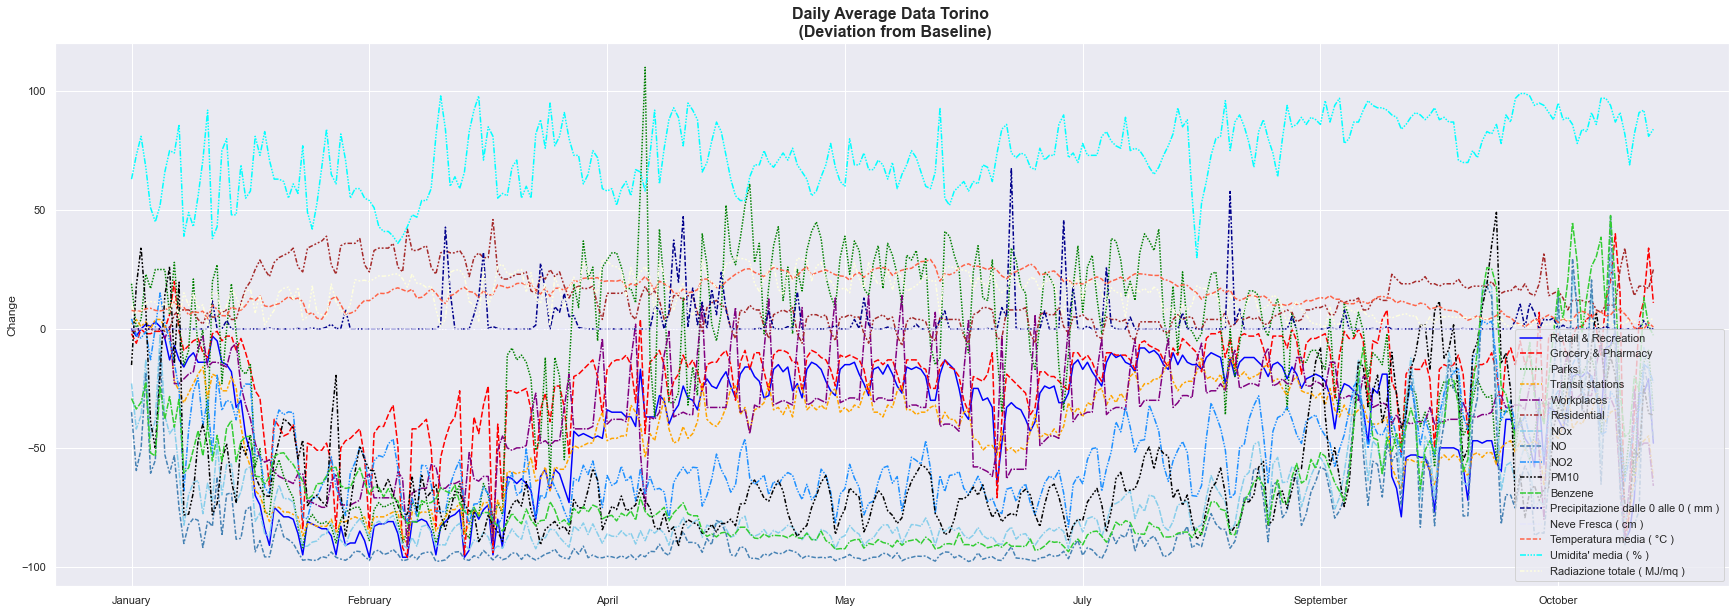

<Figure size 432x288 with 0 Axes>

In [255]:
palette = ["blue","red","green","orange","purple","brown","skyblue","steelblue", "dodgerblue","black", "limegreen",
 'darkblue', 'lavender','tomato', 'aqua', 'lightyellow',]
fig, ax = plt.subplots(figsize=(30, 10))
chart = sns.lineplot(data=merged_data, palette=palette)
plt.ylabel('Change')
plt.title("Daily Average Data Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.legend(loc='lower right')
ax.xaxis.set_major_formatter(dates.DateFormatter("%B"))
plt.figure()



### Save CSV file

In [256]:
merged_data
# Remove all columns between column index 1 to 3
merged_data.drop(merged_data.iloc[:, 0:6], inplace = True, axis = 1)
#Unpivot a DataFrame from wide to long format
csv_data = merged_data.melt(id_vars="date", value_vars=['Retail & Recreation','Grocery & Pharmacy','Parks','Transit stations','Workplaces','Residential','NOx','NO','NO2','PM10','Benzene','Precipitazione dalle 0 alle 0 ( mm )','Neve Fresca ( cm )','Temperatura media ( °C )',"Umidita' media ( % )",'Radiazione totale ( MJ/mq )'],
      var_name='type', value_name='value', ignore_index=True)
#Save data to CSV file
csv_data.to_csv('data/Output/turin_daily_deviation.csv')
